<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아달린 구현 코드
## By 경사하강법


In [8]:
# 데이터 불러오기 붓꽃 데이터
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header = None)
print(df.tail()) # 마지막 데이터 3개
print(df.head()) #처음 데이터 3개

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


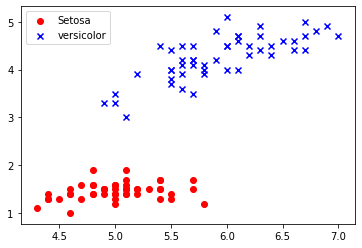

In [9]:
# 붓꽃 데이터의 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# y 데이터
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)

# x 데이터
X = df.iloc[0:100, [0, 2]].values

# matplotlib pyplot 활용
plt.scatter(X[:50,0], X[:50, 1],
            color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100,1],
            color = 'blue', marker = 'x', label = 'versicolor')
plt.legend(loc = 'upper left')
plt.show()

In [0]:

# Adaine class 생성
class AdalineGD(object):
  def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen =np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])

    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

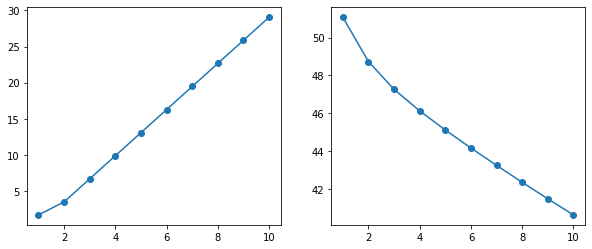

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker = 'o')

plt.show()

## By 확률적 경사하강법

In [0]:
class AdalineSGD(object):
  def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
    self.eta = eta
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.w_initialized = False
    self.random_state = random_state
  
  def fit(self, X, y):
    self.initialize_weights_(X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X, y =self._shuffle(X, y)

      cost = []

      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi,target))

      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)

    return self

  def partial_fit(self, X, y):
    if not self.w_initialized:
      self.w_initialized_weights(X.shape[1])
    
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X,y):
        self._update_weights(xi,target)
    
    else: self._update_weights(X, y)

    return self

  def _shuffle(self,X, y):
    r = self.rgen.permutation(len(y))

    return X[r], y[r]

  def initialize_weights_(self,m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi))
    error = target - output
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def activation(self, X):
    return X

  def predict(self,X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [0]:
from matplotlib.colors import ListedColormap

# 최종 적용과 graph plot
def plot_decision_regions(X, y, classifier, resolution = 0.02):

  markers = ('s', 'x') #안쓰이는 마크들은 없애서 책과 다름.. v나 ^
  colors = ('red', 'blue') # 안쓰이는 색들은 없애서 책과 다름.. cyan이나 gray
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
  
  #meshgrid를 이용한 2차원 영역에 대한 좌표값을 생성한다.
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)) 
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x = X[ y == cl, 0], y = X[ y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                  label = cl, edgecolor = 'black')

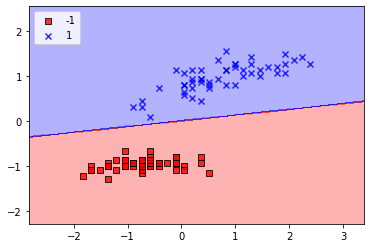

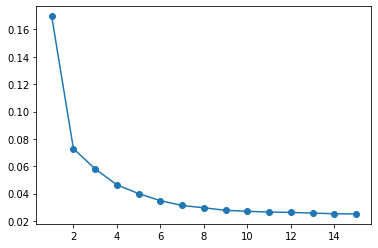

In [15]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state =1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1,len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.show()